In [7]:
from IPython.display import Image
%matplotlib inline

In [8]:
import os
print(os.getcwd())

C:\Users\Charanteja\anaconda3\AI_MACHINE_LEARNING


# Single Layer Perceptron

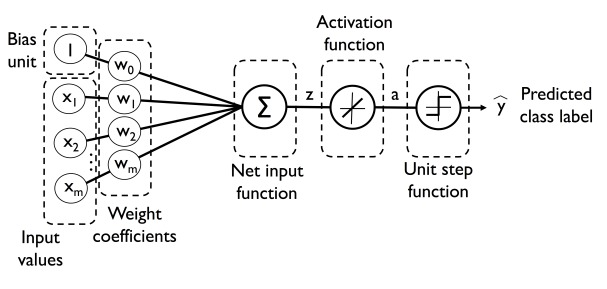

In [9]:
Image(filename ='dl_pic_1.jpeg',width=600)

In [10]:
from numpy import exp,array,random,dot

# Creating a Neural Network

In [11]:
class NeuralNetwork():
    def __init__(self):
        #seed the random number generator, so it generates the same numbers
        #everytime the program runs
        random.seed(2)
        #we model a single neuron with 3 input and 1 output connection
        #we assign a random weights to a 3*1 matrix with values in the range [-1,1]
        self.synaptic_weights=2*random.random((3,1))-1
        
        #Create a sigmoid activation function
        #This function squashes input values between 0 and 1.
    def __sigmoid(self,x):
        return 1/(1+exp(-x))
    def __sigmoid_derivative(self,x):
            #Defines the derivative of the sigmoid function, which is used in backpropagation.
            return x*(1-x)
    def think(self,inputs):
            #Implements the forward pass of the neural network. It calculates the dot product of inputs and weights, 
            #then applies the sigmoid activation function.
            return self.__sigmoid(dot(inputs,self.synaptic_weights))
    def train(self,training_set_inputs,training_set_outputs,number_of_training_iterations):
            for iteration in range(number_of_training_iterations):
                #Forward pass
                output=self.think(training_set_inputs)
                #Calculate the error
                error=training_set_outputs-output
                
                #Backpropogation
                adjustment=dot(training_set_inputs.T,error*self.__sigmoid_derivative(output))
                
                #adjust three weights
                self.synaptic_weights+=adjustment
          #This method trains the neural network using the provided training set.
          #It iterates through the training process, calculates the error, performs backpropagation, and adjusts the weights.

# Initialize the network

In [12]:
if __name__=='__main__':
    
    neural_network = NeuralNetwork()
    print('Random Starting Weight:\n')
    print(neural_network.synaptic_weights)
    
    training_set_inputs = array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])
    training_set_outputs = array([[0,1,1,0]]).T

Random Starting Weight:

[[-0.1280102 ]
 [-0.94814754]
 [ 0.09932496]]


# Training and testing the data

In [13]:
print("**************Neural Network Training Phase***********")
neural_network.train(training_set_inputs,training_set_outputs,10000)
print("New Weights after training\n")
print(neural_network.synaptic_weights)
print()

print("Considering the new situation [1,0,0]--> ?:")
print()
print(neural_network.think(array([1,0,0])))

**************Neural Network Training Phase***********
New Weights after training

[[ 9.67282529]
 [-0.20892653]
 [-4.62890667]]

Considering the new situation [1,0,0]--> ?:

[0.99993703]


# Implementing a MultiLayer Perceptron

In [65]:
import numpy as np

class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for input-hidden and hidden-output layers with random values
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.random.rand(1, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.random.rand(1, output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

   #Defines the feedforward method, which calculates the output of the neural network for a given set of inputs.
    def feedforward(self, inputs):
        # Input to hidden layer
        hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        #Calculates the input and output of the hidden layer 
        #using the weighted sum of inputs, adding biases, and applying the sigmoid activation function.

        # Hidden to output layer
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(output_layer_input)
        #Calculates the input and output of the output layer similarly to the hidden layer.
        
        return final_output
        #Returns the final output of the neural network
        
     #Defines the training method, which adjusts the weights and biases based on the provided training data.   
    def train(self, training_inputs, training_outputs, epochs, learning_rate):
        for epoch in range(epochs): #Iterates through the specified number of training epochs.

            # Forward pass
            hidden_layer_input = np.dot(training_inputs, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = self.sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            final_output = self.sigmoid(output_layer_input)

            # Backpropagation #Calculates the error and delta for the output layer.
            error = training_outputs - final_output
            output_delta = error * self.sigmoid_derivative(final_output)

            #Calculates the error and delta for the hidden layer.
            hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
            hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(hidden_layer_output)

            # Update weights and biases using the calculated deltas and the learning rate.
            self.weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
            self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

            self.weights_input_hidden += training_inputs.T.dot(hidden_layer_delta) * learning_rate
            self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate




# Initialize and Train 

In [66]:
# Define training data (inputs) and labels
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
training_outputs = np.array([[0, 1, 1, 0]]).T

# Create a Multi-Layer Perceptron with 2 input neurons, 2 hidden neurons, and 1 output neuron
mlp = MultiLayerPerceptron(input_size=2, hidden_size=2, output_size=1)

# Train the MLP
mlp.train(training_inputs, training_outputs, epochs=10000, learning_rate=0.1)

# Test the MLP
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = mlp.feedforward(test_inputs)
print("Predictions:", predictions)

Predictions: [[0.05866156]
 [0.94595055]
 [0.9451431 ]
 [0.05925702]]


In [67]:
print(weights_input_hidden)

[[3.18168607 5.98985222 1.83620067]
 [3.26020491 5.94574591 1.73011152]]


In [68]:
import numpy as np
l = 1/(1+np.exp(-0.963639))
l

0.7238498016573642